## Graphical Causal Model
### 1. Conditional independence of the potential outcomes
$ (Y_0,Y_1) \bot T|X $
<br>
- What is this?
<br>
EX) The effect of a medicine on an ill patient. If only medicine is given to highly sick patients, it might look that the medication is badly affecting.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import graphviz as gr
from matplotlib import style
import seaborn as sns
from matplotlib import pyplot as plt
style.use("fivethirtyeight")

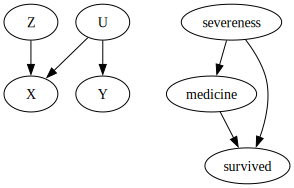

In [2]:
g = gr.Digraph()
g.edge("Z", "X")
g.edge("U", "X")
g.edge("U", "Y")

g.edge("medicine", "survived")
g.edge("severeness", "survived")
g.edge("severeness", "medicine")

g

- Each node is a random var.
- Z causes X, U causes X and Y.

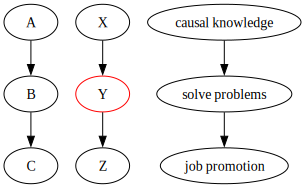

In [3]:
g = gr.Digraph()
g.edge("A", "B")
g.edge("B", "C")

g.edge("X", "Y")
g.edge("Y", "Z")
g.node("Y", "Y", color="red")


g.edge("causal knowledge", "solve problems")
g.edge("solve problems", "job promotion")

g

- Y is conditioned
- $ E[Promo|Solve Prob, Causal Knowl] = E[Promotion|Solve Prob] $
- $ A \not\bot C $ and $ A \bot C|B$ -> The dependce flow in the direct path from A to C is blocked when we condition on B

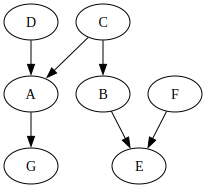

In [4]:
g = gr.Digraph()
g.edge("C", "A")
g.edge("C", "B")
g.edge("D", "A")
g.edge("B", "E")
g.edge("F", "E")
g.edge("A", "G")

g

- $D \perp C$. It contains a collider that it has not been conditioned on.
- $D \not\perp C| A$ It contains a collider that it has been conditioned on.

- $D \not\perp C| G$ It contains the descendent of a collider that has been conditioned on. You can see G as some kind of proxy for A here.

- $A \perp F$ It contains a collider, B->E<-F, that it has not been conditioned on.

- $A \not\perp F|E$ It contains a collider, B->E<-F, that it has been conditioned on.

- $A \perp F|E, C$ It contains a collider, B->E<-F, that it has been conditioned on, but it contains a non collider that has been conditioned on. Conditioning on E opens the path, but conditioning on C closes it again.

$ E[Y|T=1] - E[Y|T=0] = \underbrace{E[Y_1 - Y_0|T=1]}_{ATET} + \underbrace{\{ E[Y_0|T=1] - E[Y_0|T=0] \}}_{BIAS}$

### Confounding Bias

- When the treatment and outcome share a common cause.
- EX) Education - treatment, income - outcome. Intelligence is the common cause(Confounding Bias)

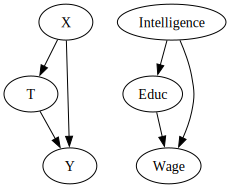

In [5]:
g = gr.Digraph()
g.edge("X", "T")
g.edge("X", "Y")
g.edge("T", "Y")

g.edge("Intelligence", "Educ"),
g.edge("Intelligence", "Wage"),
g.edge("Educ", "Wage")
g



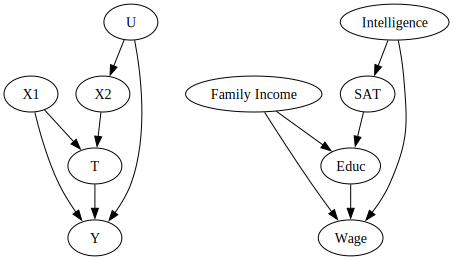

In [6]:
g = gr.Digraph()
g.edge("X1", "T")
g.edge("T", "Y")
g.edge("X2", "T")
g.edge("X1", "Y")
g.edge("U", "X2")
g.edge("U", "Y")

g.edge("Family Income", "Educ")
g.edge("Educ", "Wage")
g.edge("SAT", "Educ")
g.edge("Family Income", "Wage")
g.edge("Intelligence", "SAT")
g.edge("Intelligence", "Wage")
g

- We can't control the intelligence, but we can SAT.


In [7]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import graphviz as gr
%matplotlib inline